In [1]:
import math
import numpy as np
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---

In [ ]:
vgg16 = tf.keras.applications.vgg16.VGG16(include_top=True, weights="imagenet")

### Profiling the first FC layer in VGG 16

In [ ]:
# 26th weight matrix represents all neuron connections 
# between the flattened last ConvLayer and the first FC layer
weight_matrix = vgg16.get_weights()[26]

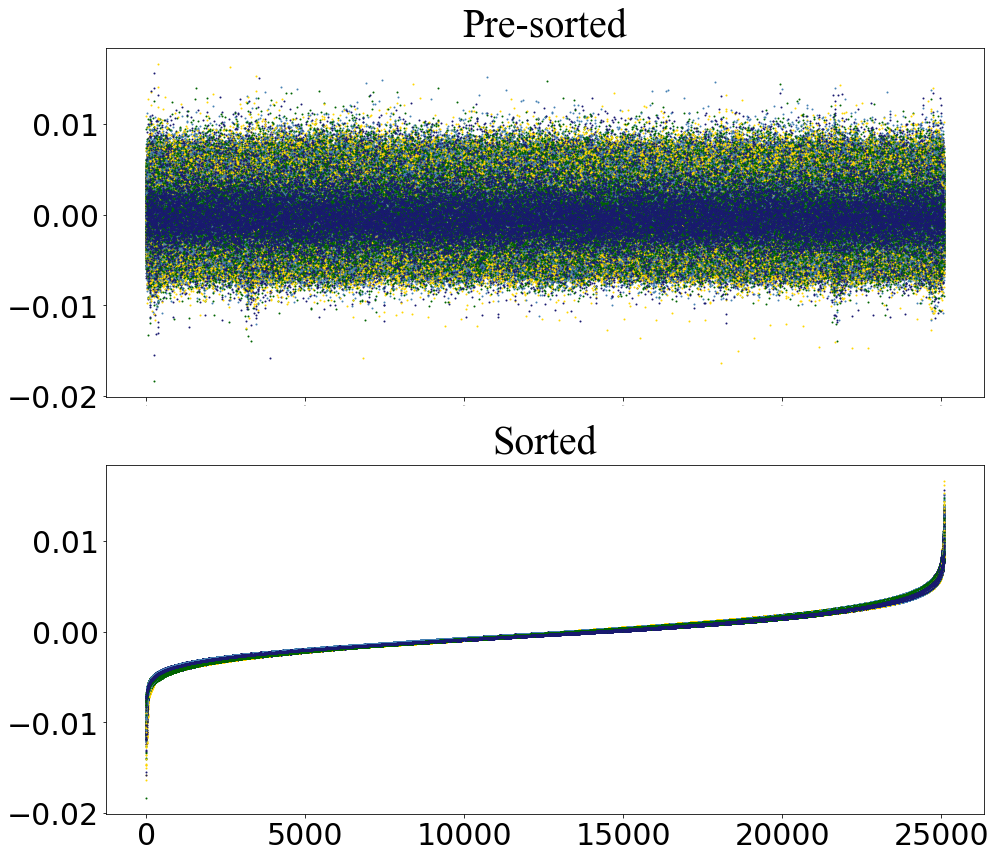

In [131]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(14, 12))
ax0.plot(weight_matrix, 'o', markersize=1)
ax0.tick_params('x',labelsize=0)
ax0.tick_params('y', labelsize=30)
ax0.set_title('Pre-sorted', size=40, y=1.02)

# Sort weight vectors (columns)
ax1.plot(np.sort(weight_matrix, axis=0), 'o', markersize=1)
ax1.tick_params(labelsize=30)
ax1.set_title('Sorted', size=40, y=1.02)
plt.tight_layout()
plt.show()

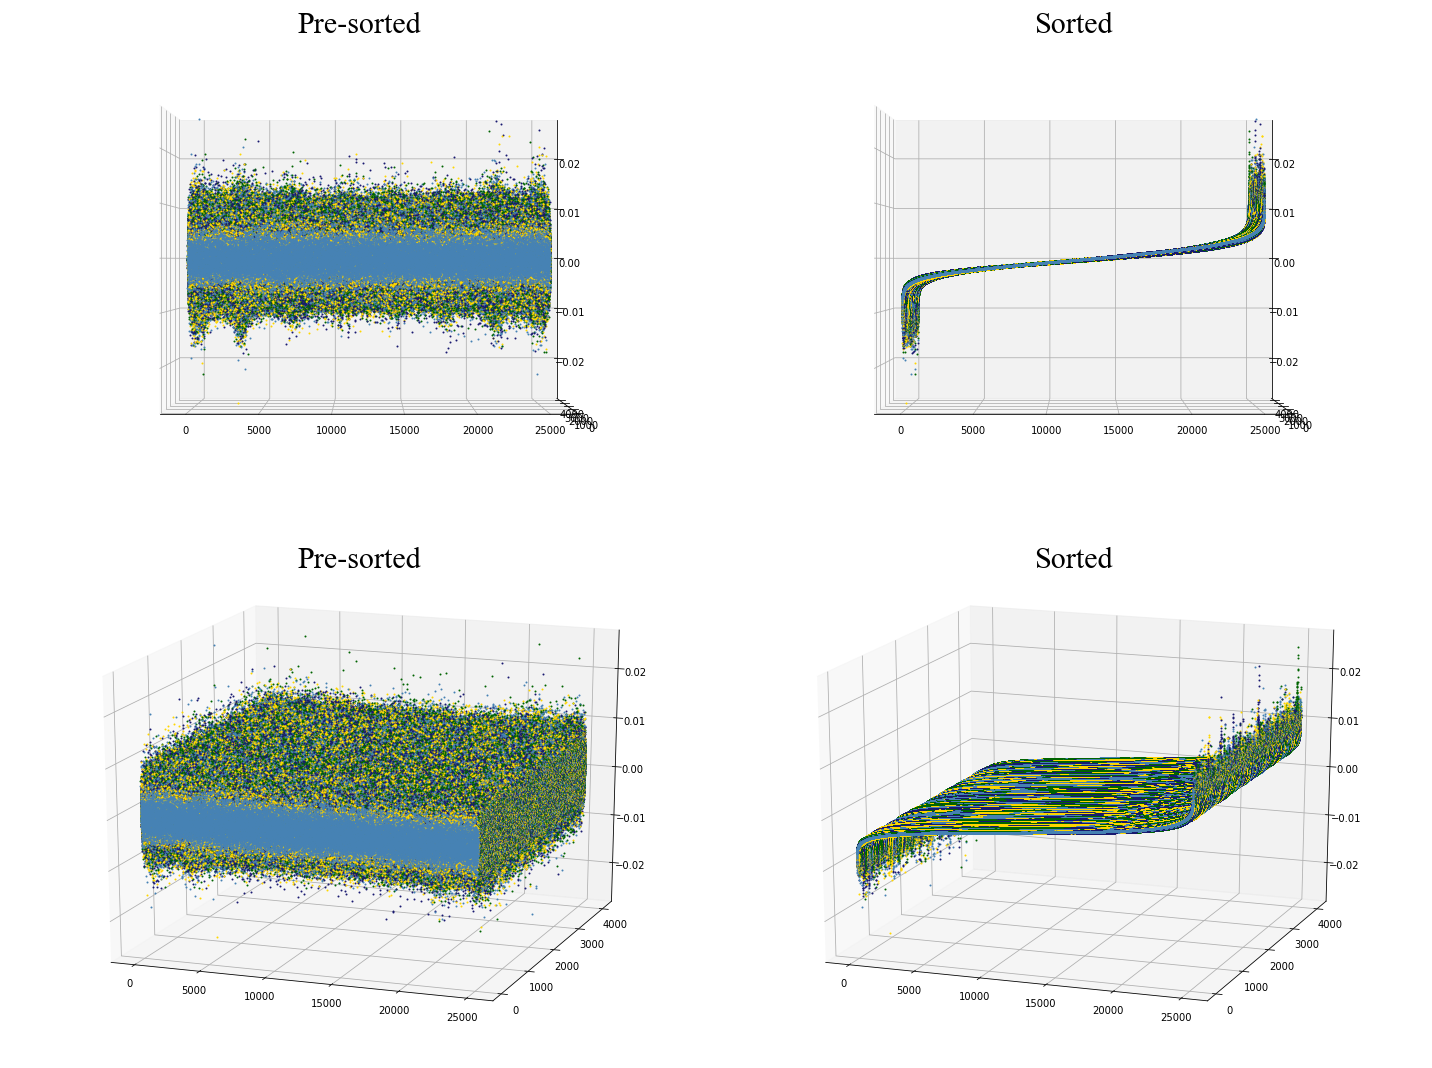

In [135]:
# For storing sorted weight vectors
m = [weight_matrix]
# For storing pre-sorted weight vectors
um = []

for i in range(len(m)):
    # Transpose so that weight vectors
    # are exposed to the second dimension
    um.append(m[i].T)
    m[i] = np.sort(m[i], 0).T

# Plot weight profile
fig = plt.figure(figsize=(20, 15))
rows = 2
cols = 2
col = 0

ax1 = fig.add_subplot(rows, cols, 1, projection='3d')
for i in reversed(range(um[col].shape[0])):
    ax1.plot(np.arange(um[col].shape[1]), np.full(
        um[col].shape[1], i), um[col][i], 'o', markersize=1)
ax1.view_init(0, 270)
ax1.set_title('Pre-sorted', size=30, fontname='Times New Roman', y=1.02)

ax2 = fig.add_subplot(rows, cols, 3, projection='3d')
for i in reversed(range(um[col].shape[0])):
    ax2.plot(np.arange(um[col].shape[1]), np.full(
        um[col].shape[1], i), um[col][i], 'o', markersize=1)
ax2.view_init(18, 290)
ax2.set_title('Pre-sorted', size=30, fontname='Times New Roman', y=1.02)

ax3 = fig.add_subplot(rows, cols, 2, projection='3d')
for i in reversed(range(m[col].shape[0])):
    ax3.plot(np.arange(m[col].shape[1]), np.full(
        m[col].shape[1], i), m[col][i], 'o', markersize=1)
ax3.view_init(0, 270)
ax3.set_title('Sorted', size=30, fontname='Times New Roman', y=1.02)

ax4 = fig.add_subplot(rows, cols, 4, projection='3d')
for i in reversed(range(m[col].shape[0])):
    ax4.plot(np.arange(m[col].shape[1]), np.full(
        m[col].shape[1], i), m[col][i], 'o', markersize=1)
ax4.view_init(18, 290)
ax4.set_title('Sorted', size=30, fontname='Times New Roman', y=1.02)

plt.tight_layout()
plt.show()

---

In [ ]:
import sys
sys.path.append("..")
from train_by_reconnect.viz_utils import Profiler

#### Example: DenseNet121

In [ ]:
densenet121 = tf.keras.applications.DenseNet121(include_top=True, weights="imagenet")

121 121
Plotting 121 items
Using grid of size 11 x 11


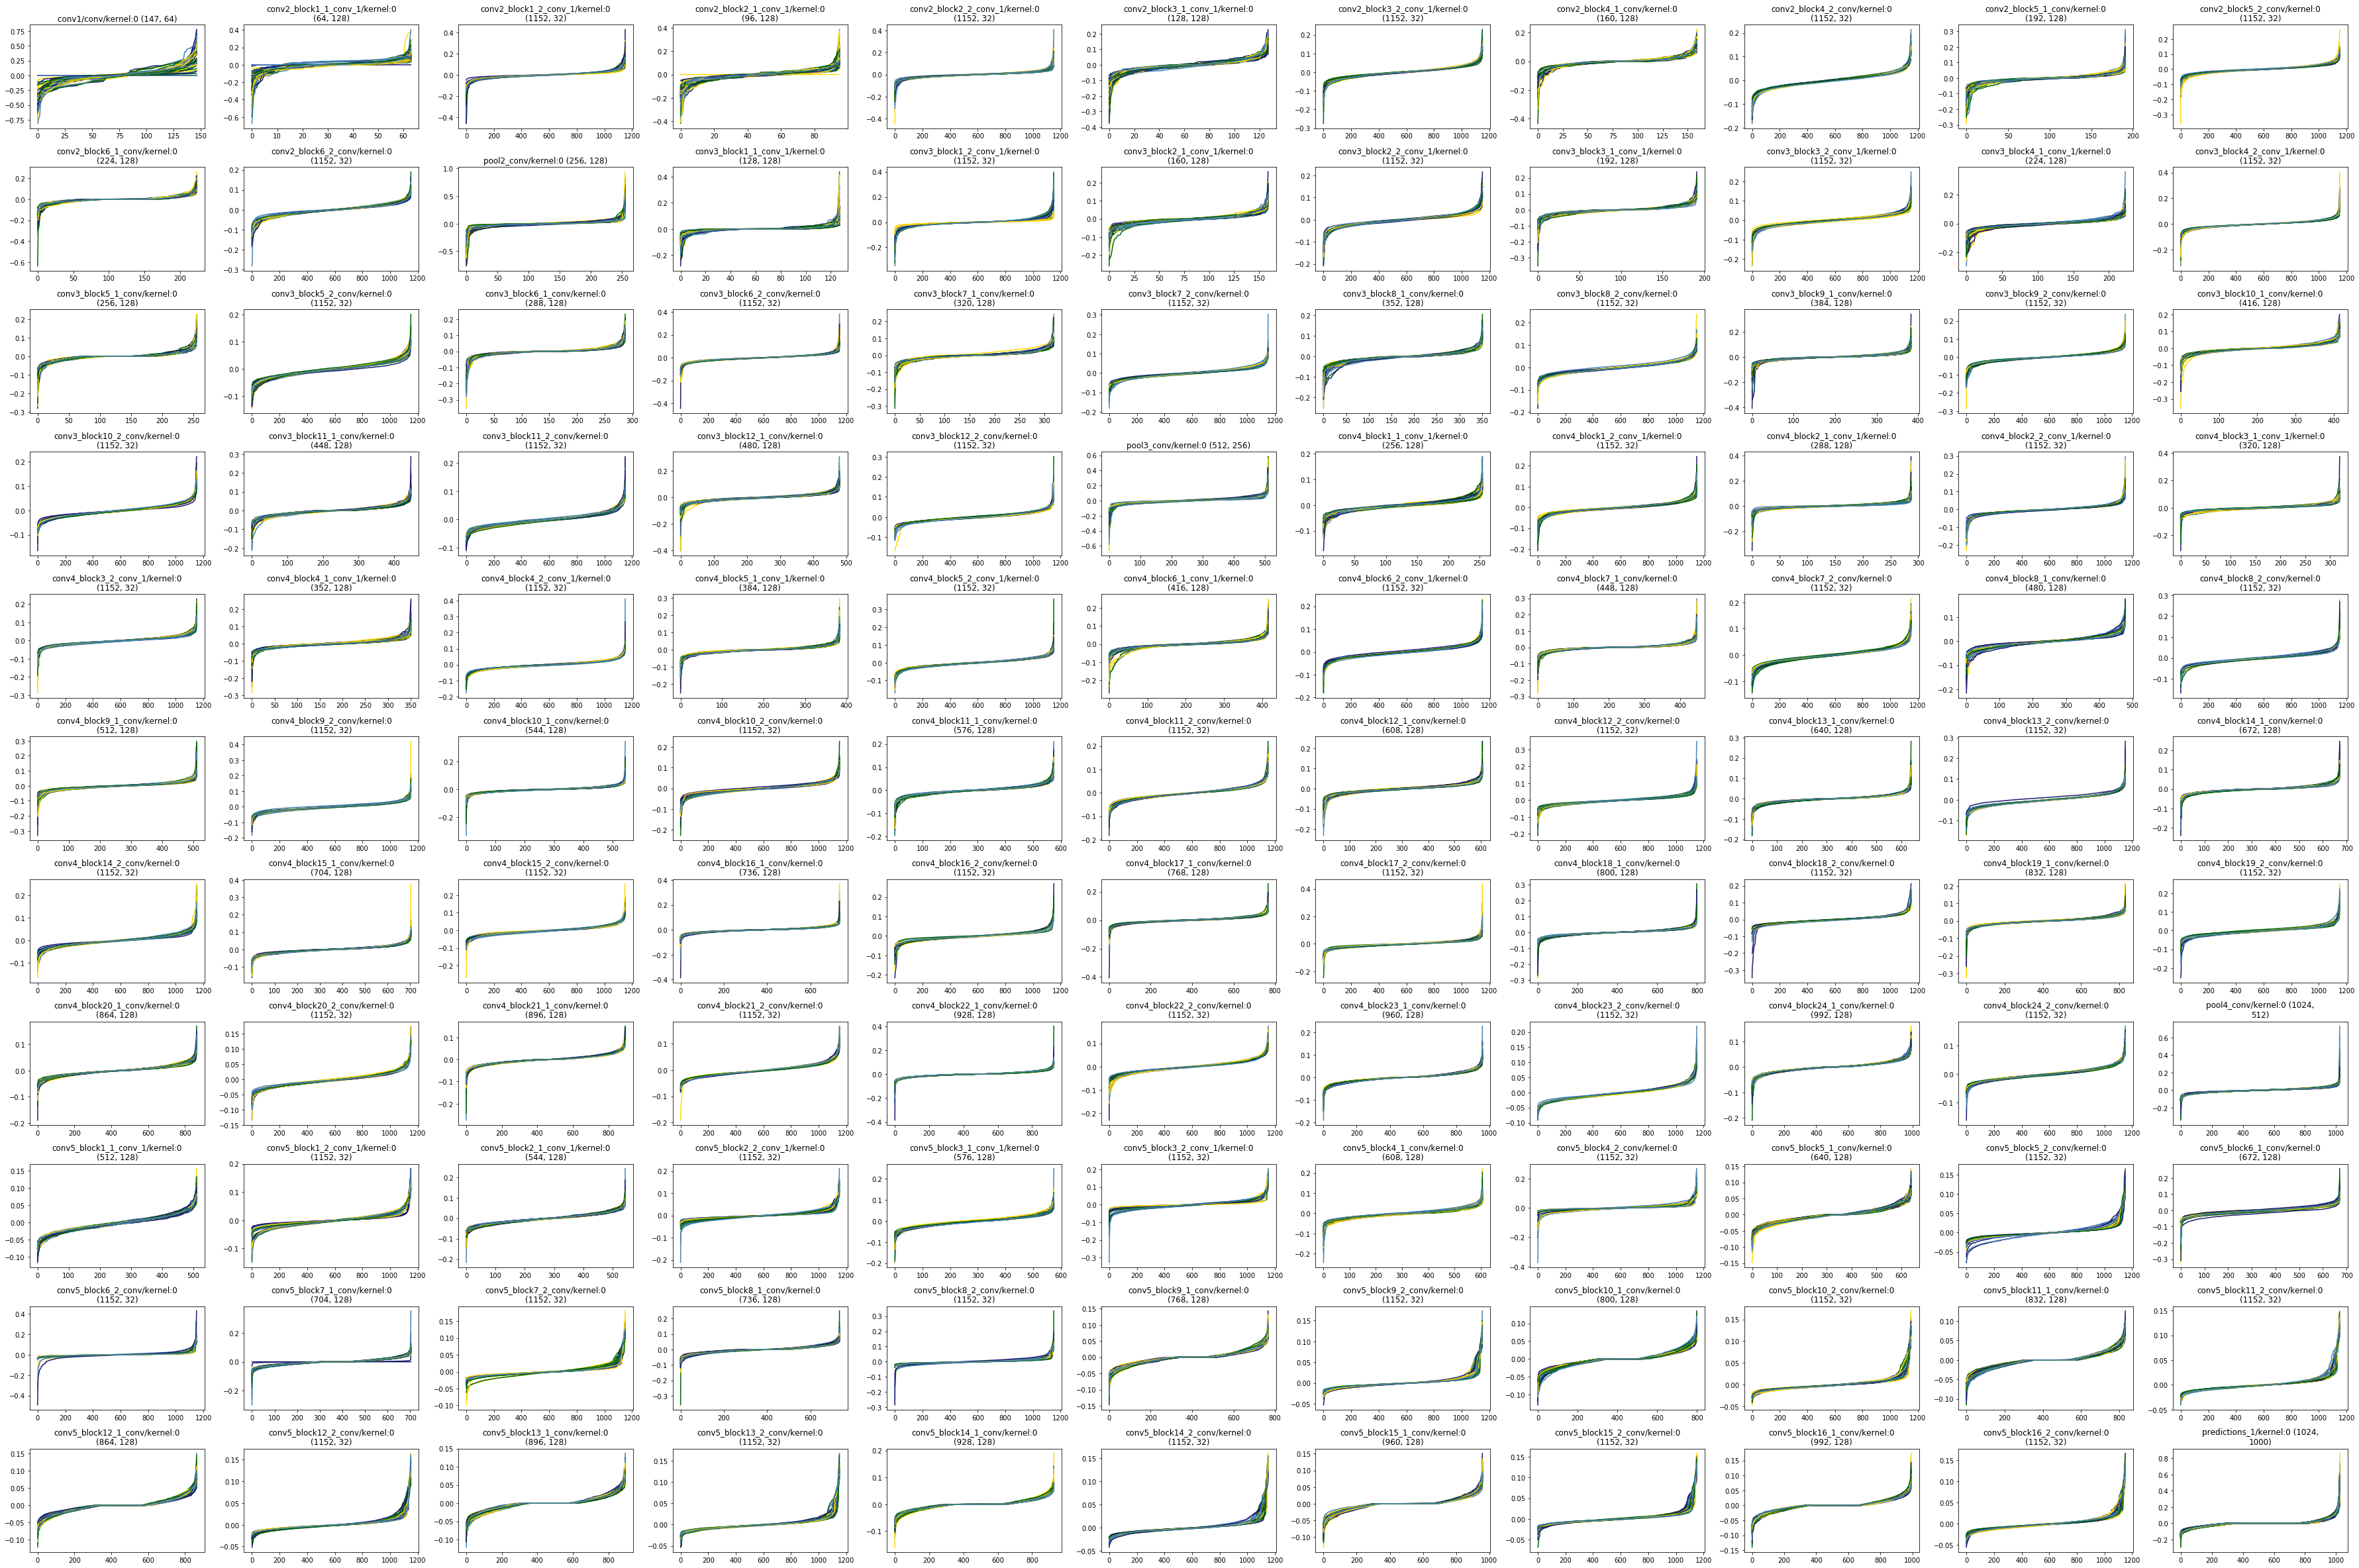

In [8]:
# Double click the image to zoom in
Profiler(densenet121)